In this notebook we explore the basics of viualising and manipulating stock data.

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install yfinance

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

In [ ]:
# import data
'''fb = pd.read_csv('Files/home/jovyan/work/data/facebook.csv', index_col=0) #ticker = yf.download(symbol, start=start, end=end, interval=interval)
ms = pd.read_csv('Files/home/jovyan/work/data/microsoft.csv', index_col=0)
aapl = pd.read_csv('Files/home/jovyan/work/data/apple.csv', index_col=0)
tsla = pd.read_csv('Files/home/jovyan/work/data/tsla.csv', index_col=0)'''

meta = pd.DataFrame(yf.download('META', start='2000-01-01', end='2023-01-01'))
ms = pd.DataFrame(yf.download('MSFT', start='2000-01-01', end='2023-01-01'))
aapl = pd.DataFrame(yf.download('AAPL', start='2000-01-01', end='2023-01-01'))
tsla = pd.DataFrame(yf.download('TSLA', start='2000-01-01', end='2023-01-01'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#visaulise datasets
meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
# DataFrame methods
meta.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2.673000e+03
mean,147.961691,149.839027,146.087654,147.991912,147.991912,3.120242e+07
std,86.969082,88.057578,85.914834,86.999128,86.999128,2.720501e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,77.800003,78.529999,77.050003,77.830002,77.830002,1.618930e+07
50%,142.259995,144.559998,140.869995,142.279999,142.279999,2.321740e+07
75%,191.360001,194.029999,188.470001,191.289993,191.289993,3.616910e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,5.735764e+08


In [ ]:
# Slicing DataFrame
aapl.loc['2015-01-01':'2015-12-31', 'Close']
#tsla.iloc[624:, : ]

Date
2015-01-02    27.332500
2015-01-05    26.562500
2015-01-06    26.565001
2015-01-07    26.937500
2015-01-08    27.972500
                ...    
2015-12-24    27.007500
2015-12-28    26.705000
2015-12-29    27.184999
2015-12-30    26.830000
2015-12-31    26.315001
Name: Close, Length: 252, dtype: float64

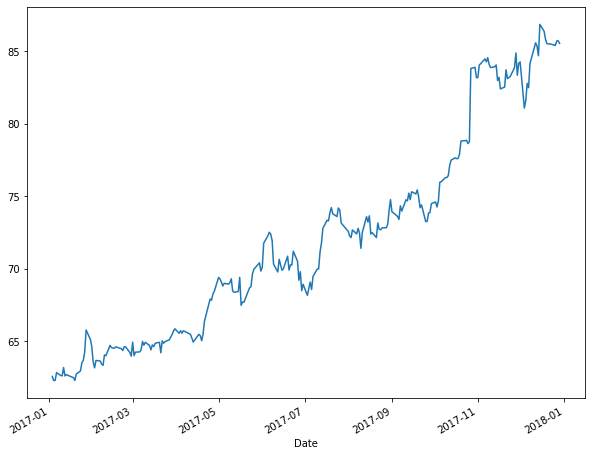

In [ ]:
# Visualising stock price
plt.figure(figsize=(10,8))
ms.loc['2017-01-01':'2017-12-31', 'Close'].plot() #2017
plt.show()

In [ ]:
# select single column in DataFrame
meta['Close']

Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2022-12-23    118.040001
2022-12-27    116.879997
2022-12-28    115.620003
2022-12-29    120.260002
2022-12-30    120.339996
Name: Close, Length: 2673, dtype: float64

In [ ]:
# select multiple columns in DataFrame
meta[['Open','Close']]

,Open,Close
Date,,
2012-05-18,42.049999,38.230000
2012-05-21,36.529999,34.029999
2012-05-22,32.610001,31.000000
2012-05-23,31.370001,32.000000
2012-05-24,32.950001,33.029999
...,...,...
2022-12-23,116.029999,118.040001
2022-12-27,117.930000,116.879997
2022-12-28,116.250000,115.620003


In [ ]:
# Create 'Price' column -> close price if tomorrow
meta['Price'] = meta['Close'].shift(-1)
meta[['Close','Price']]

,Close,Price
Date,,
2012-05-18,38.230000,34.029999
2012-05-21,34.029999,31.000000
2012-05-22,31.000000,32.000000
2012-05-23,32.000000,33.029999
2012-05-24,33.029999,31.910000
...,...,...
2022-12-23,118.040001,116.879997
2022-12-27,116.879997,115.620003
2022-12-28,115.620003,120.260002


In [ ]:
# Create 'Price difference' column
# PriceDiff = Close Price of tomorrow -Close Price of today 
meta['PriceDiff'] = meta['Price'] - meta['Close']
meta['PriceDiff']

Date
2012-05-18   -4.200001
2012-05-21   -3.029999
2012-05-22    1.000000
2012-05-23    1.029999
2012-05-24   -1.119999
                ...   
2022-12-23   -1.160004
2022-12-27   -1.259995
2022-12-28    4.639999
2022-12-29    0.079994
2022-12-30         NaN
Name: PriceDiff, Length: 2673, dtype: float64

In [ ]:
# Create 'daily return' column
#Daily Return = Price difference / Close price of today
meta['Return'] = meta['PriceDiff']/meta['Close']
meta['Return']

Date
2012-05-18   -0.109861
2012-05-21   -0.089039
2012-05-22    0.032258
2012-05-23    0.032187
2012-05-24   -0.033909
                ...   
2022-12-23   -0.009827
2022-12-27   -0.010780
2022-12-28    0.040131
2022-12-29    0.000665
2022-12-30         NaN
Name: Return, Length: 2673, dtype: float64

In [ ]:
# Create 'Direction' Column
#Rules: if PriceDiff > 0 then assign 1 else (PriceDiff < 0) assign -1
meta['Direction'] = [1 if meta.loc[i, 'PriceDiff']>0 else -1 for i in meta.index]
meta['Direction']

Date
2012-05-18   -1
2012-05-21   -1
2012-05-22    1
2012-05-23    1
2012-05-24   -1
             ..
2022-12-23   -1
2022-12-27   -1
2022-12-28    1
2022-12-29    1
2022-12-30   -1
Name: Direction, Length: 2673, dtype: int64

In [ ]:
#visualise DataFrame
meta.head()

,Open,High,Low,Close,Adj Close,Volume,Price,PriceDiff,Return,Direction
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999,-4.200001,-0.109861,-1
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000,-3.029999,-0.089039,-1
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000,1.000000,0.032258,1
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999,1.029999,0.032187,1
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000,-1.119999,-0.033909,-1


In [ ]:
# Create 'moving average' column
meta['Average3'] = (meta['Close'] + meta['Close'].shift(1) + meta['Close'].shift(2))/3
meta['Average3']

Date
2012-05-18           NaN
2012-05-21           NaN
2012-05-22     34.419999
2012-05-23     32.343333
2012-05-24     32.010000
                 ...    
2022-12-23    118.306669
2022-12-27    117.346667
2022-12-28    116.846667
2022-12-29    117.586667
2022-12-30    118.740000
Name: Average3, Length: 2673, dtype: float64

In [ ]:
meta.head()

,Open,High,Low,Close,Adj Close,Volume,Price,PriceDiff,Return,Direction,Average3
Date,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999,-4.200001,-0.109861,-1,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000,-3.029999,-0.089039,-1,NaN
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000,1.000000,0.032258,1,34.419999
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999,1.029999,0.032187,1,32.343333
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000,-1.119999,-0.033909,-1,32.010000


In [ ]:
# Calculate moving average using .rolling()
meta['MA40'] = meta['Close'].rolling(40).mean() #Fast signal

In [ ]:
meta['MA200'] = meta['Close'].rolling(200).mean() #Slow signal

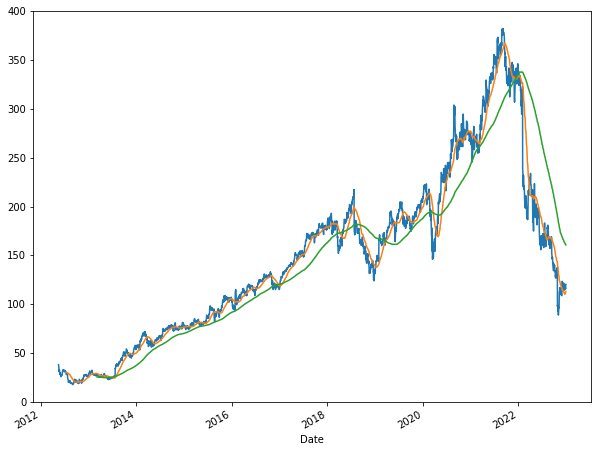

In [ ]:
# Plote moving averages
plt.figure(figsize=(10,8))
meta['Close'].plot()
meta['MA40'].plot()
meta['MA200'].plot()
plt.show()

In [ ]:
#Strategy - Fast signal and slow signal
ms['MA10'] = ms['Close'].rolling(10).mean() #Fast Signal

In [ ]:
ms['MA50'] = ms['Close'].rolling(50).mean() #Slow Signal

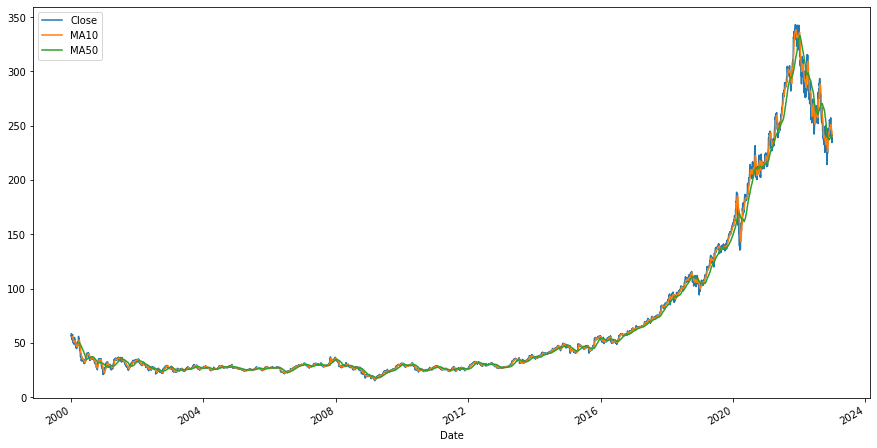

In [ ]:
# Plote moving averages
plt.figure(figsize=(15,8))
ms['Close'].plot(legend=True)
ms['MA10'].plot(legend=True)
ms['MA50'].plot(legend=True)
plt.show()

In [ ]:
#Long or not(Short)?
ms['Shares'] = [1 if ms.loc[i, 'MA10'] > ms.loc[i, 'MA50'] else 0 for i in ms.index]

In [ ]:
# Daily profit
ms['Close1'] = ms['Close'].shift(-1)

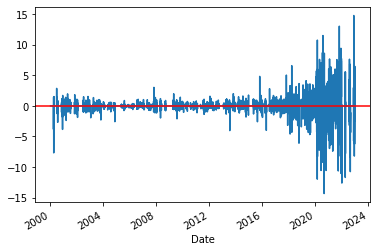

In [ ]:
ms['Profit'] = [ms.loc[i, 'Close1'] - ms.loc[i, 'Close'] 
    if ms.loc[i, 'Shares'] == 1 else 0 for i in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [ ]:
# Cumulative Wealth
ms['Wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.133545,21207000,246.395000,240.645399,1,236.960007,-1.769989,56.003742
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.367981,16688600,244.840001,240.813399,1,234.529999,-2.430008,53.573734
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.944031,17457100,242.600999,240.753399,1,241.009995,6.479996,60.053730
2022-12-29,235.649994,241.919998,235.649994,241.009995,240.407837,19770700,240.979999,240.803599,1,239.820007,-1.189987,58.863743
2022-12-30,238.210007,239.960007,236.660004,239.820007,239.220825,21930800,240.061000,240.870399,0,NaN,0.000000,58.863743


Total money you make is  58.86374282836914
Total money you spent is  58.28125


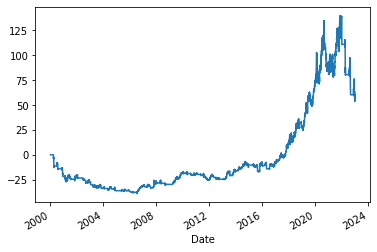

In [ ]:
print("Total money you make is ", ms.loc[ms.index[-2], 'Wealth'])
print("Total money you spent is ", ms.loc[ms.index[0], 'Close'])
ms['Wealth'].plot()